### MNIST image classification with CNN & Keras

This is Part 2 of a MNIST digit classification [notebook](). Here I will be using Keras<sup>[[1]](https://keras.io/)</sup> to build a Convolutional Neural network for classifying hand written digits. My previous model achieved accuracy of 98.4%, I will try to reach atleast 99% accuracy using Artificial Neural Networks in this notebook. I will also present basic intution behind CNN.

#### About MNIST Dataset

MNIST<sup>[[2]](http://yann.lecun.com/exdb/mnist/)</sup> is dataset of handwritten digits and contains a training set of 60,000 examples and a test set of 10,000 examples. So far Convolutional Neural Networks(CNN) give best accuracy on MNIST dataset, a comprehensive list of papers with their accuracy on MNIST is given [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). Best accuracy acheived is 99.79%.<sup>[[3]](https://cs.nyu.edu/~wanli/dropc/)</sup>

This is a sample from MNIST dataset.
<center><img src="MnistExamples.png"></center>

#### Importing dataset & packages

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

/home/mohit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Preprocessing MNIST dataset 

Loading MNIST dataset and splitting into train & test

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 15

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


_train set contains 60000 images & test set contains 10000 image sample. Each image is of 28x28 pixel & have a associated class in training set._

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Building Model

Before building the CNN model using keras, lets briefly understand what are CNN & how they work. 

**Convolutional Neural Networks(CNN) or ConvNet** are popular neural network architectures commonly used in Computer Vision problems like Image Classification & Object Detection. Consider an color image of 1000x1000 pixels or 3 million inputs, using a normal neural network with 1000 hidden units in first layer will generate a weight matrix of 3 billion parameters! CNN uses set of Convolution & Pooling operations to deal with this complexity.

**Convolution Operation:** Convolution operation involves overlapping of a filter/kernal of fixed size over the input image matrix and then sliding across pixel-by-pixel to cover the entire image/matrix. As shown below as 3x3  filter(yellow) window slides over 5x5 image matrix all values within yellow matrix are added & stored in new Convolved(pink) matrix.

<center><img src="convolution.gif"></center>

**Pooling Operation:** Along with Convolution layers CNN also use pooling layers to reduce the size of the representation, to speed the computation, as well as make some of the features detected a bit more robust. Pooling is of 2 types: Max Pooling & Average Pooling. We will be using Max Pooling in our ConvNet. Max Pooling operation simply find maximum number within sliding filter window over image matrix and return it new matrix as shown below. So maximum numbers 6,8,3,4 are selected from each 2x2 window from a 4x4 image matrix. 

<center><img src="Max_pooling.png"></center>

**Dropout:** Dropout is a regularization technique used in neural networks to prevent overfitting. For dropout we go through each layer of network and set some probability of eliminating a node in neural network. Eliminating these units at random results in spreading & shrinking of weights.

<center><img src="dropout.png" style="width:450px;height:280px;"></center>


**Typical CNN Architecture:** Combination of all these & fully connected layers results in various ConvNet architectures used today for various computer vision tasks. Below is an example of this architecture:

<center><img src="Typical_cnn.png" style="width:600px;height:280px;"></center>

This was a very brief introduction about ConvNet layers. you can use below links to understand this topic further:
1. [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/)
2. [Coursera course on Convolutional Neural Networks by Andrew Ng](https://www.coursera.org/learn/convolutional-neural-networks)

Now lets build our model with all layers discussed above along with Dense or fully connected layers.

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


#### Model Architecture



In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<center><img src="model_plot.png"></center>

#### Training Model

In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test), callbacks=[TQDMNotebookCallback()])

**Note:** I am using CUDA enabled NVIDIA GPU GeForce GTX 750 Ti to train above model with 15 epochs which takes ~20 minutes to train. Training might be extremly slow on CPU, You can reduce number of epochs by updating variable 'epochs'.  

#### Model Accuracy on train & test data

In [9]:
history.history['acc']

[0.9004999999682108,
 0.9665333333651225,
 0.9753333333015441,
 0.9796666666348776,
 0.9816333333651225,
 0.9840333333015442,
 0.9850000000317891,
 0.9856666666666667,
 0.9871000000317891,
 0.9873333333651225,
 0.9885499999682108,
 0.9892166666666666,
 0.9893999999682108,
 0.9901,
 0.9895499999682108]

_Model accuracy improved from 90.04% in epoch 1 to 98.95% in epoch 15_

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.9909


#### Accuracy Plot

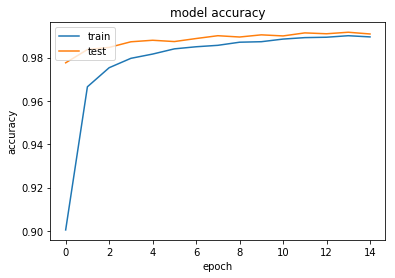

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Loss Plot

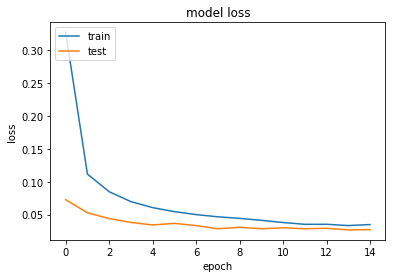

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Popular CNN Architectures

We achieved accuracy of 99.09% using our simple ConvNet architecture. There are many popular CNN architectures which can be used to achieve better accuracy on MNIST dataset, some of these architectures are:

1. VGG<sup>[4]</sup> 

2. Resnet<sup>[5]</sup>

3. LeNet-5<sup>[6]</sup>

Many competitors also use ensemble of these models to get slightly better accuracy. In my next notebook I will discuss an ensemble method with VGG & ResNet to improve our accuracy on MNIST.

#### Refrences:
 
1. https://keras.io/
2. http://yann.lecun.com/exdb/mnist/
3. Wan, Li, et al. "Regularization of neural networks using dropconnect." International Conference on Machine Learning. 2013.
4. Simonyan, Karen, and Andrew Zisserman. "Very deep convolutional networks for large-scale image recognition." arXiv preprint arXiv:1409.1556 (2014).
5. He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.
6. LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.